<html>
    <a id='toc'></a>
    <h1 style="color:#990011FF; background-color:#FCF6F5FF; font-size:55px; border:10px solid brown ; padding:15px;"><center><b>TABLE OF CONTENTS ⏩</b></center></h1>
</html>

* [ Motivation 💪](#1)
* [ Dataset 📋](#2)
* [ Overview 📺](#3) 
* [ Visualisation 📉](#4) 

  * [ Univariate Analysis](#4.1)
    * [ Categorical Features](#4.1.1)
    
    * [ Continuous Features](#4.1.2)
    
  * [ Bivariate Analysis](#4.2)
    * [ Continuous Vs Categorical](#4.2.1)
    
    * [ Continuous VS Continuous](#4.2.2)
    
  * [ Multivariate Analysis](#4.3)
  
* [ Model and Prediction 🧭](#5)
  * [ Preprocessing](#5.1)
  
  * [ Logistic Regression](#5.2)
  
  * [ Random Forest Classifier](#5.3)
  
    * [ Feature Importance Of RF](#5.3.1)
    
  *  [ Light GBM Classifier](#5.4)
  
     * [ Feature Importance Of LGBM](#5.4.1)

[Table of Contents](#toc)
<html>
    <a id="1"></a>
    <h1 style="color:#990011FF; background-color:#FCF6F5FF; font-size:55px; border:10px solid brown ; padding:15px;"><center><b>1. MOTIVATION 💪</b></center></h1>
</html>

![Heart Attack](https://media.sciencephoto.com/image/c0249835/800wm/C0249835-Heart_Attack_and_Atherosclerosis.jpg)

**What is heart attack?**

A heart attack happens when the flow of oxygen-rich blood in one or more of the coronary arteries, which supply the heart muscle, suddenly becomes blocked, and a section of heart muscle can’t get enough oxygen. The blockage is usually caused when a plaque ruptures. If blood flow isn’t restored quickly, either by a medicine that dissolves the blockage or a catheter placed within the artery that physically opens the blockage, the section of heart muscle begins to die

**Why we need to predict chances of heart attack early?**

1. Early detection of heart attacks is one of the crucial stage to save the life of a person
2. Now-a-days it is become very common in india and even lethal. India have more than one crore cases every year
3. If we can predict the chances of getting heart attack through machine learning it will be great breakthrough in the field of medical science
4. We have the dataset which we can use to predict it to some extent but we need more data and features to make our model more robust

[Table of contents](#toc)
<html>
    <a id="2"></a>
    <h1 style="color:#990011FF; background-color:#FCF6F5FF; font-size:55px; border:10px solid brown ; padding:15px;"><center><b>2. DATASET 📋</b></center></h1>
</html>

1. **age** - age in years

2. **sex** - sex (1 = male; 0 = female)

3. **cp** - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)

4. **trestbps** - resting blood pressure (in mm Hg on admission to the hospital)

5. **chol** - serum cholestoral in mg/dl

6. **fbs** - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. **restecg** - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)

8. **thalach** - maximum heart rate achieved

9. **exang** - exercise induced angina (1 = yes; 0 = no)

10. **oldpeak** - ST depression induced by exercise relative to rest

11. **slope** - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)

12. **ca** - number of major vessels (0-3) colored by flourosopy

13. **thal(thallium stress)** - 0 to 3

14. **Output** - 0(less chance of heart attack) and 1(more chance of heart attack)

<html>
    <a id="3"></a>
    <h1 style="color:#990011FF; background-color:#FCF6F5FF; font-size:55px; border:10px solid brown; padding:15px;"><center><b>3. OVERVIEW 📺</b></center></h1>
</html>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
print("***** Shape of the dataset *****")
df.shape

***** Shape of the dataset *****


(303, 14)

In [3]:
print("***** First five rows *****")
df.head()

***** First five rows *****


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print("***** Column names in dataset *****")
print(list(df.columns))

***** Column names in dataset *****
['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


In [5]:
print("***** Basic Infomation about dataset *****")
print()
df.info()

***** Basic Infomation about dataset *****

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
print("***** Description of data *****")
df.describe().T.style.bar(subset=['mean'],color='#205ff2').background_gradient(subset=['std','25%','50%','75%'],cmap="coolwarm")

***** Description of data *****


,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
sex,303.000000,0.683168,0.466011,0.000000,0.000000,1.000000,1.000000,1.000000
cp,303.000000,0.966997,1.032052,0.000000,0.000000,1.000000,2.000000,3.000000
trtbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
fbs,303.000000,0.148515,0.356198,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,303.000000,0.528053,0.525860,0.000000,0.000000,1.000000,1.000000,2.000000
thalachh,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
exng,303.000000,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


In [12]:
cat_columns=['sex' , 'exng' , 'caa' , 'cp' , 'fbs' , 'restecg' , 'thall' , 'slp']
print("***** Unique values in categorical features *****")
print()

for i in cat_columns:
    print("Unique values in",i,'feature are : ',end=" ")
    print(df[i].unique())
    print()

***** Unique values in categorical features *****

Unique values in sex feature are :  [1 0]

Unique values in exng feature are :  [0 1]

Unique values in caa feature are :  [0 2 1 3 4]

Unique values in cp feature are :  [3 2 1 0]

Unique values in fbs feature are :  [1 0]

Unique values in restecg feature are :  [0 1 2]

Unique values in thall feature are :  [1 2 3 0]

Unique values in slp feature are :  [0 2 1]



In [13]:
cat_columns=['sex' , 'exng' , 'caa' , 'cp' , 'fbs' , 'restecg' , 'thall' , 'slp']
print("***** Value counts in categorical features *****")
print()

for i in cat_columns:
    print("Value counts of",i,'feature are : ')
    print(df[i].value_counts())
    print()

***** Value counts in categorical features *****

Value counts of sex feature are : 
1    207
0     96
Name: sex, dtype: int64

Value counts of exng feature are : 
0    204
1     99
Name: exng, dtype: int64

Value counts of caa feature are : 
0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

Value counts of cp feature are : 
0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Value counts of fbs feature are : 
0    258
1     45
Name: fbs, dtype: int64

Value counts of restecg feature are : 
1    152
0    147
2      4
Name: restecg, dtype: int64

Value counts of thall feature are : 
2    166
3    117
1     18
0      2
Name: thall, dtype: int64

Value counts of slp feature are : 
2    142
1    140
0     21
Name: slp, dtype: int64



In [14]:
print("***** dtypes of columns in dataset ****")
print(df.dtypes)

***** dtypes of columns in dataset ****
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


In [15]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

[Table of contents](#toc)
<html>
    <a id="4"></a>
    <h1 style="color:#990011FF; background-color:#FCF6F5FF; font-size:55px; border:10px solid brown; padding:15px;"><center><b>4. VISUALIZATIONS 📉</b></center></h1>
</html>

In [16]:
def with_hue(data,feature,ax):
    
    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold',fontsize=14)
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold',fontsize=14)



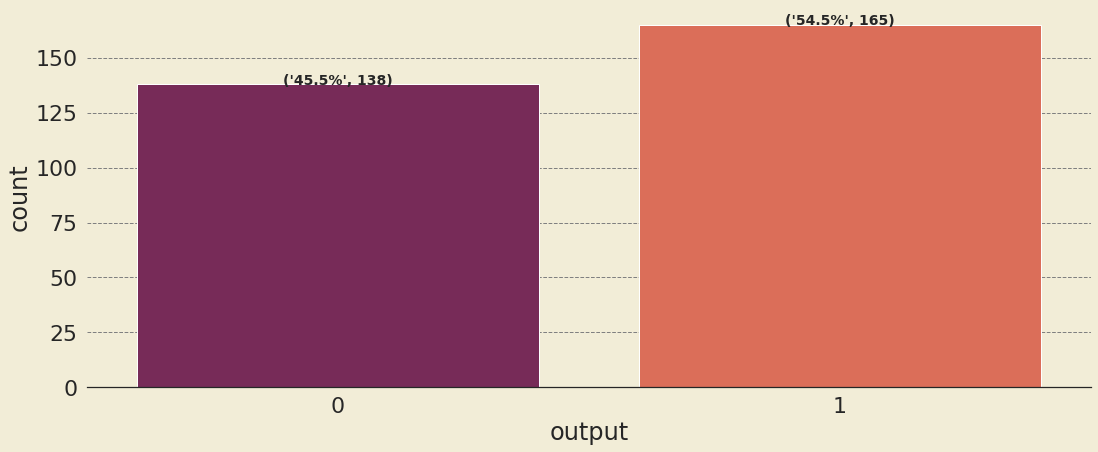

In [17]:
sns.set_theme(context="notebook",style="white",font_scale=2)
fig=plt.figure(figsize=(18,7))

#Setting plot and background color
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

#Dealing with spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='y',color='gray')

#countplot
c=sns.countplot(data=df,x='output',palette='rocket')

#percentage on bar plots
without_hue(df,'output',c)

[Table of Contents](#toc)

<html>
    <a id='4.1'></a>
    <h1 style="color:coral; background-color:teal; font-size:25px; padding:15px;"><center><b>4.1. UNIVARIATE ANALYSIS</b></center></h1>
</html>

In [18]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Categorical Features**: Sex , exng , caa , cp , fbs , rest_ecg , thall , slp

**Continuous Features** : Age ,  trtbps , chol , thalachh , oldpeak

[Table of Contents](#toc)

<html>
    <a id='4.1.1'></a>
    <h1 style="color:#101820FF; background-color:#FEE715FF; font-size:20px; padding:15px;"><center><b>4.1.1. CATEGORICAL FEATURES</b></center></h1>
</html>

**Categorical Features**: Sex , exng , caa , cp , fbs , rest_ecg , thall , slp


In [19]:
# I have tried to make my code more dynamic here so that it can be easily reusable 
def plotting_cat_features(nrows,ncols,cat_columns):
    
    f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,34))
    f.patch.set_facecolor('#F2EDD7FF')

    #Setting background and foreground color
    for i in range(0,nrows):
        for j in range(0,ncols):
            ax[i][j].set_facecolor('#F2EDD7FF')

    #Plotting count plot 
    for i in range(0,nrows):
        for j in range(0,ncols):
            if(i==0): #For [0,0] sub plot
                if(j==0):
                    ax[i][j].spines['bottom'].set_visible(False)
                    ax[i][j].spines['left'].set_visible(False)
                    ax[i][j].spines['top'].set_visible(False)
                    ax[i][j].spines['right'].set_visible(False)
                    
                    ax[i][j].tick_params(left=False,bottom=False)
                    ax[i][j].set_xticklabels([])
                    ax[i][j].set_yticklabels([])
                    ax[i][j].text(0.5,0.5,"Count plot of\ncategorical features",
                                    horizontalalignment="center",
                                    verticalalignment='center',
                                    fontweight='bold',fontsize=20,fontstyle='italic')
                elif(j==1): #For [0,1] subplot
                    ax[i][j].spines['bottom'].set_visible(False)
                    ax[i][j].spines['left'].set_visible(False)
                    ax[i][j].spines['top'].set_visible(False)
                    ax[i][j].spines['right'].set_visible(False)
                    
                    ax[i][j].tick_params(left=False,bottom=False)
                    ax[i][j].set_xticklabels([])
                    ax[i][j].set_yticklabels([])
                    ax[i][j].text(0.5,0.5,"Count plot with respect to\ntarget",
                                    horizontalalignment="center",
                                    verticalalignment='center',
                                    fontweight='bold',fontsize=20,fontstyle='italic')

            else:
                #Without hueness
                if(j==0):
                    a1=sns.countplot(data=df,x=cat_columns[i-1],palette='rocket',ax=ax[i][j])
                    without_hue(df,cat_columns[i-1],a1)
                #With hueness
                elif(j==1):
                    a2=sns.countplot(data=df,x=cat_columns[i-1],hue='output',ax=ax[i][j],palette='rocket')
                    with_hue(df,cat_columns[i-1],a2)
                
                #Dealing with spines
                ax[i][j].spines['top'].set_visible(False)
                ax[i][j].spines['right'].set_visible(False)
                ax[i][j].spines['left'].set_visible(False)
                ax[i][j].grid(linestyle="--",axis='y',color='gray')
        
        
    

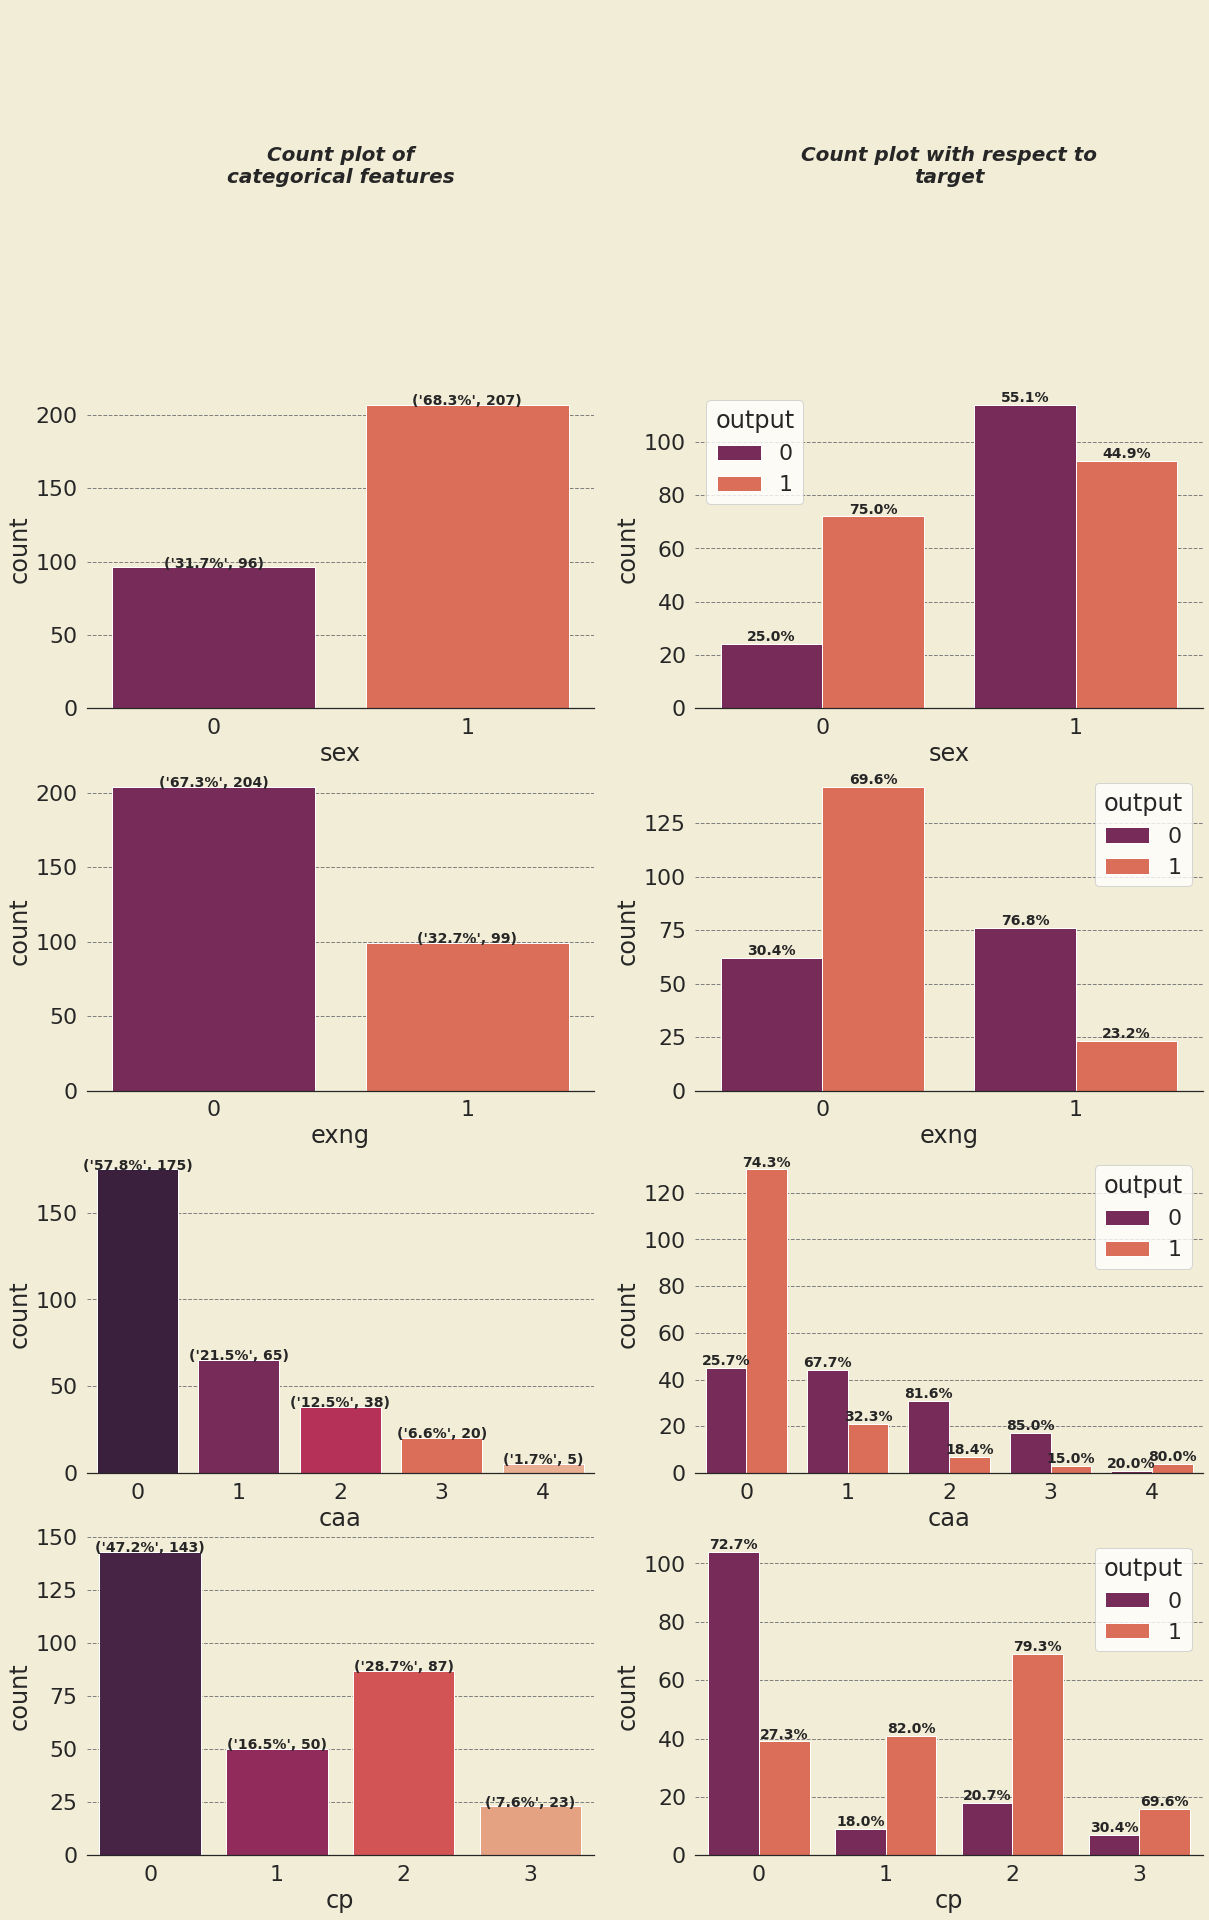

In [20]:
#First four columns
cat_columns=['sex' , 'exng' , 'caa' , 'cp']        
plotting_cat_features(5,2,cat_columns)   

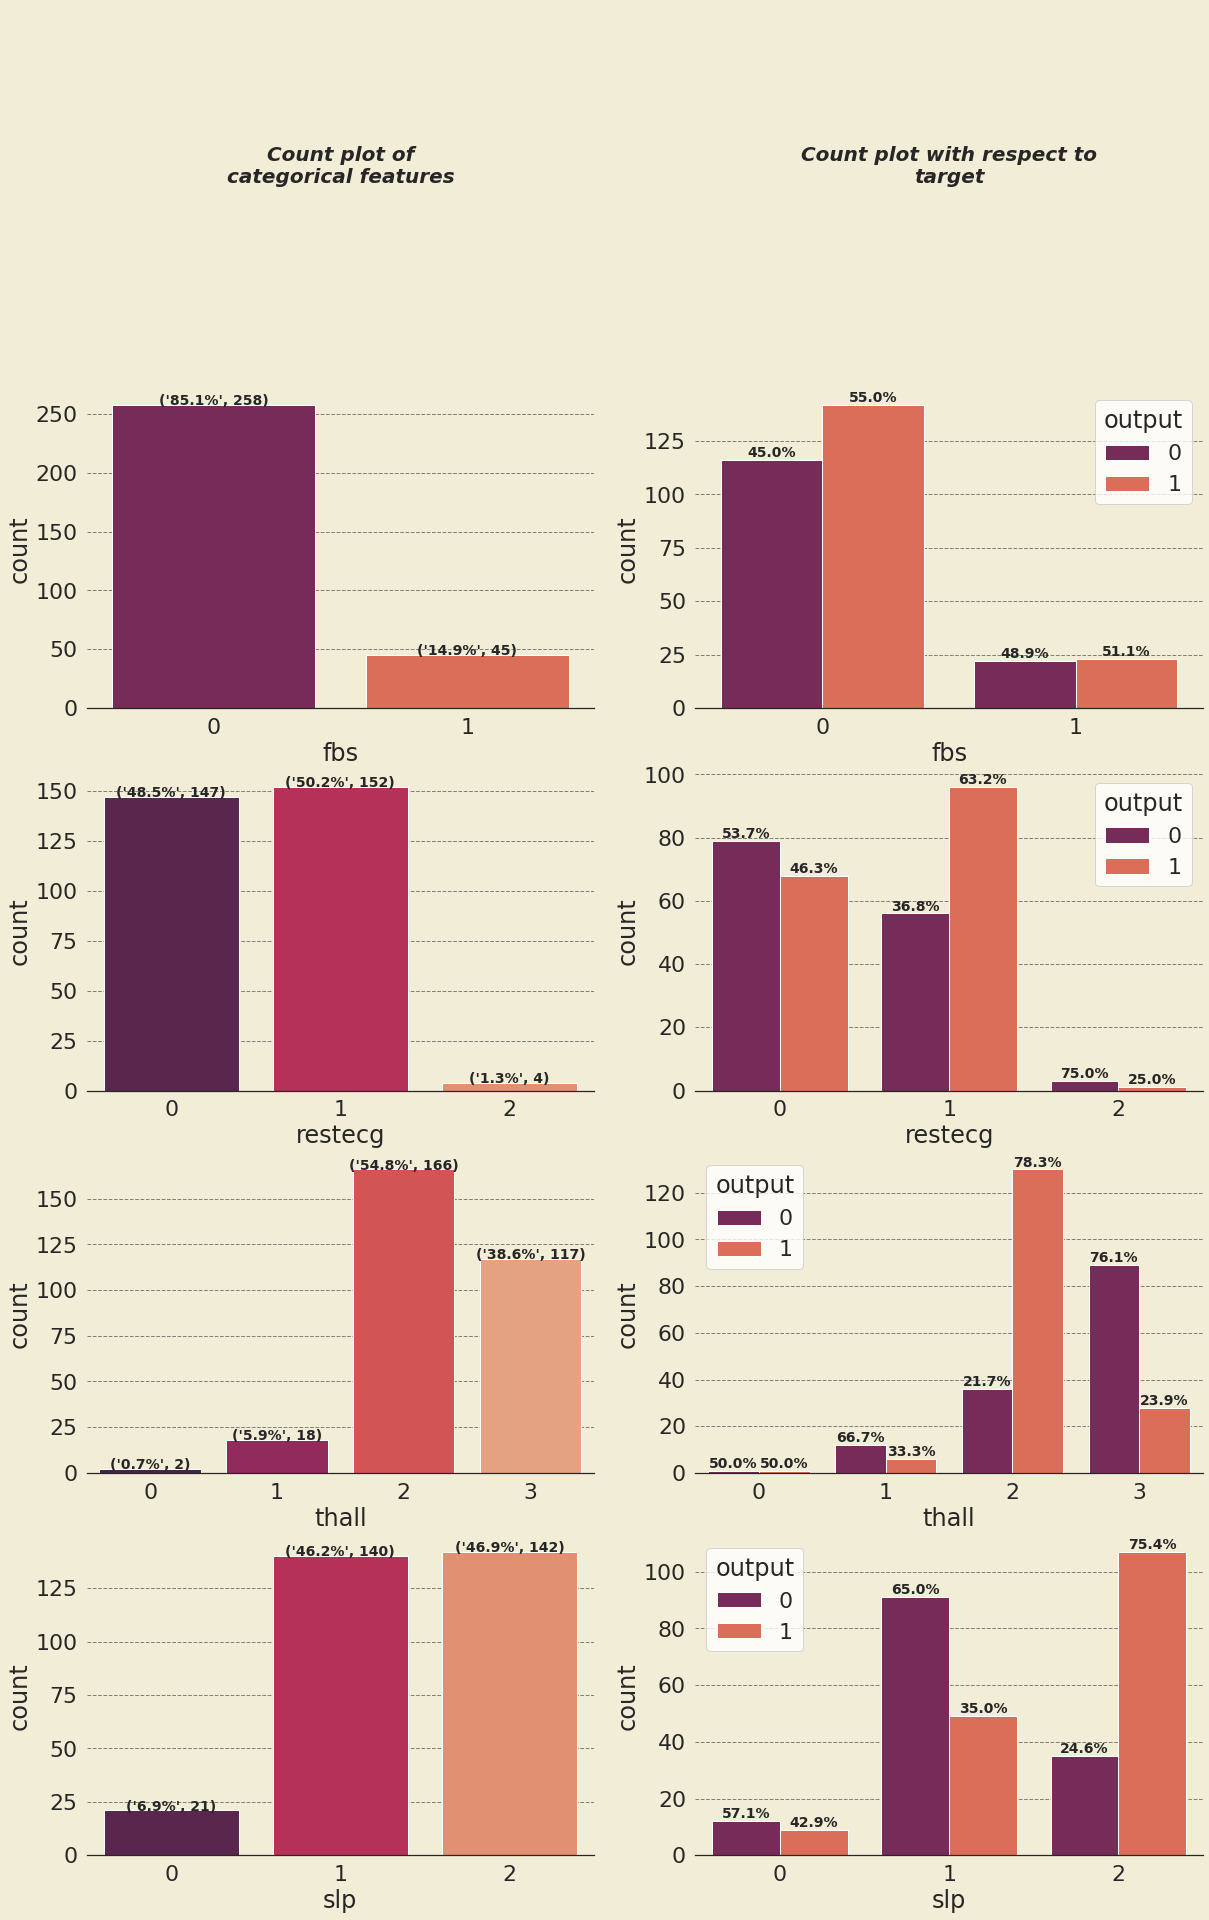

In [21]:
cat_columns=['fbs' , 'restecg' , 'thall' , 'slp'] 
plotting_cat_features(5,2,cat_columns)

<html>
    <body style="background-color:LIGHTBLUE;">
        <h1 style="color:PINK;">Observations from univariate analysis of categorical features</h1>
    </body>
</html>

1. **Sex** : There are 96 Females in the data out of which 75% have a chance of heart attack and in case of Males(207) 45% have a chance to get heart attack , so according to data Females here have more chances to get  heart attack instead of Males

2. **exng** : People whose 'exercise induced angina' is 0 are more likely to get heart attacks

3. **caa** : Who have number of major vessels=0 are prone to get heart attacks

4. **Chest pain** : Person who have atypical chest pain have more chances to get heart attacks i.e. 82% while other chest pains also shows the danger of heart attacks

5. **Fasting blood sugar(fbs)**: This feature is showing that it doesn't matter whether blood sugar is greater than or less than 120 , more than 50% of people have chances to get heart attack

6. **resting electrocardiographic(restecg)** : 63.2% people who have ST-T wave abnormality are more prone and but in normal cases 46.3% is also a big number

7. **Thallium stress results(thall)** : people with thallium stress 3 have more chances i.e. 78.3%

[Table of Contents](#toc)

<html>
    <a id='4.1.2'></a>
    <h1 style="color:#101820FF; background-color:#FEE715FF; font-size:20px; padding:15px;"><center><b>4.1.2. CONTINUOUS FEATURES</b></center></h1>
</html>

**Continuous Features** : Age ,  trtbps , chol , thalachh , oldpeak

**HISTPLOT OF CONTINUOUS FEATURES**

In [22]:
def plotting_con_features(nrows,ncols,con_features):
    f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,34))
    f.patch.set_facecolor('#F2EDD7FF')

    #Setting background and foreground color
    for i in range(0,nrows):
        for j in range(0,ncols):
            ax[i][j].set_facecolor('#F2EDD7FF')

    #Plotting count plot 
    for i in range(0,nrows):
        for j in range(0,ncols):
            if(i==0): #For [0,0] sub plot
                if(j==0):
                    ax[i][j].spines['bottom'].set_visible(False)
                    ax[i][j].spines['left'].set_visible(False)
                    ax[i][j].spines['top'].set_visible(False)
                    ax[i][j].spines['right'].set_visible(False)
                    
                    ax[i][j].tick_params(left=False,bottom=False)
                    ax[i][j].set_xticklabels([])
                    ax[i][j].set_yticklabels([])
                    ax[i][j].text(0.5,0.5,"Histplot of\ncontinuous features",
                                    horizontalalignment="center",
                                    verticalalignment='center',
                                    fontweight='bold',fontsize=20,fontstyle='italic')
                elif(j==1): #For [0,1] subplot
                    ax[i][j].spines['bottom'].set_visible(False)
                    ax[i][j].spines['left'].set_visible(False)
                    ax[i][j].spines['top'].set_visible(False)
                    ax[i][j].spines['right'].set_visible(False)
                    
                    ax[i][j].tick_params(left=False,bottom=False)
                    ax[i][j].set_xticklabels([])
                    ax[i][j].set_yticklabels([])
                    ax[i][j].text(0.5,0.5,"Histplot with respect to\ntarget",
                                    horizontalalignment="center",
                                    verticalalignment='center',
                                    fontweight='bold',fontsize=20,fontstyle='italic')

            else:        
                #Without hueness
                if(j==0):
                    a1=sns.histplot(data=df,x=con_columns[i-1],palette='rocket',ax=ax[i][j],kde=True)
                #With hueness
                elif(j==1):
                    a2=sns.histplot(data=df,x=con_columns[i-1],hue='output',ax=ax[i][j],palette='rocket',multiple='stack',kde=True)

                #Dealing with spines
                ax[i][j].spines['top'].set_visible(False)
                ax[i][j].spines['right'].set_visible(False)
                ax[i][j].spines['left'].set_visible(False)
                ax[i][j].grid(linestyle="--",axis='y',color='gray')
        
        
    

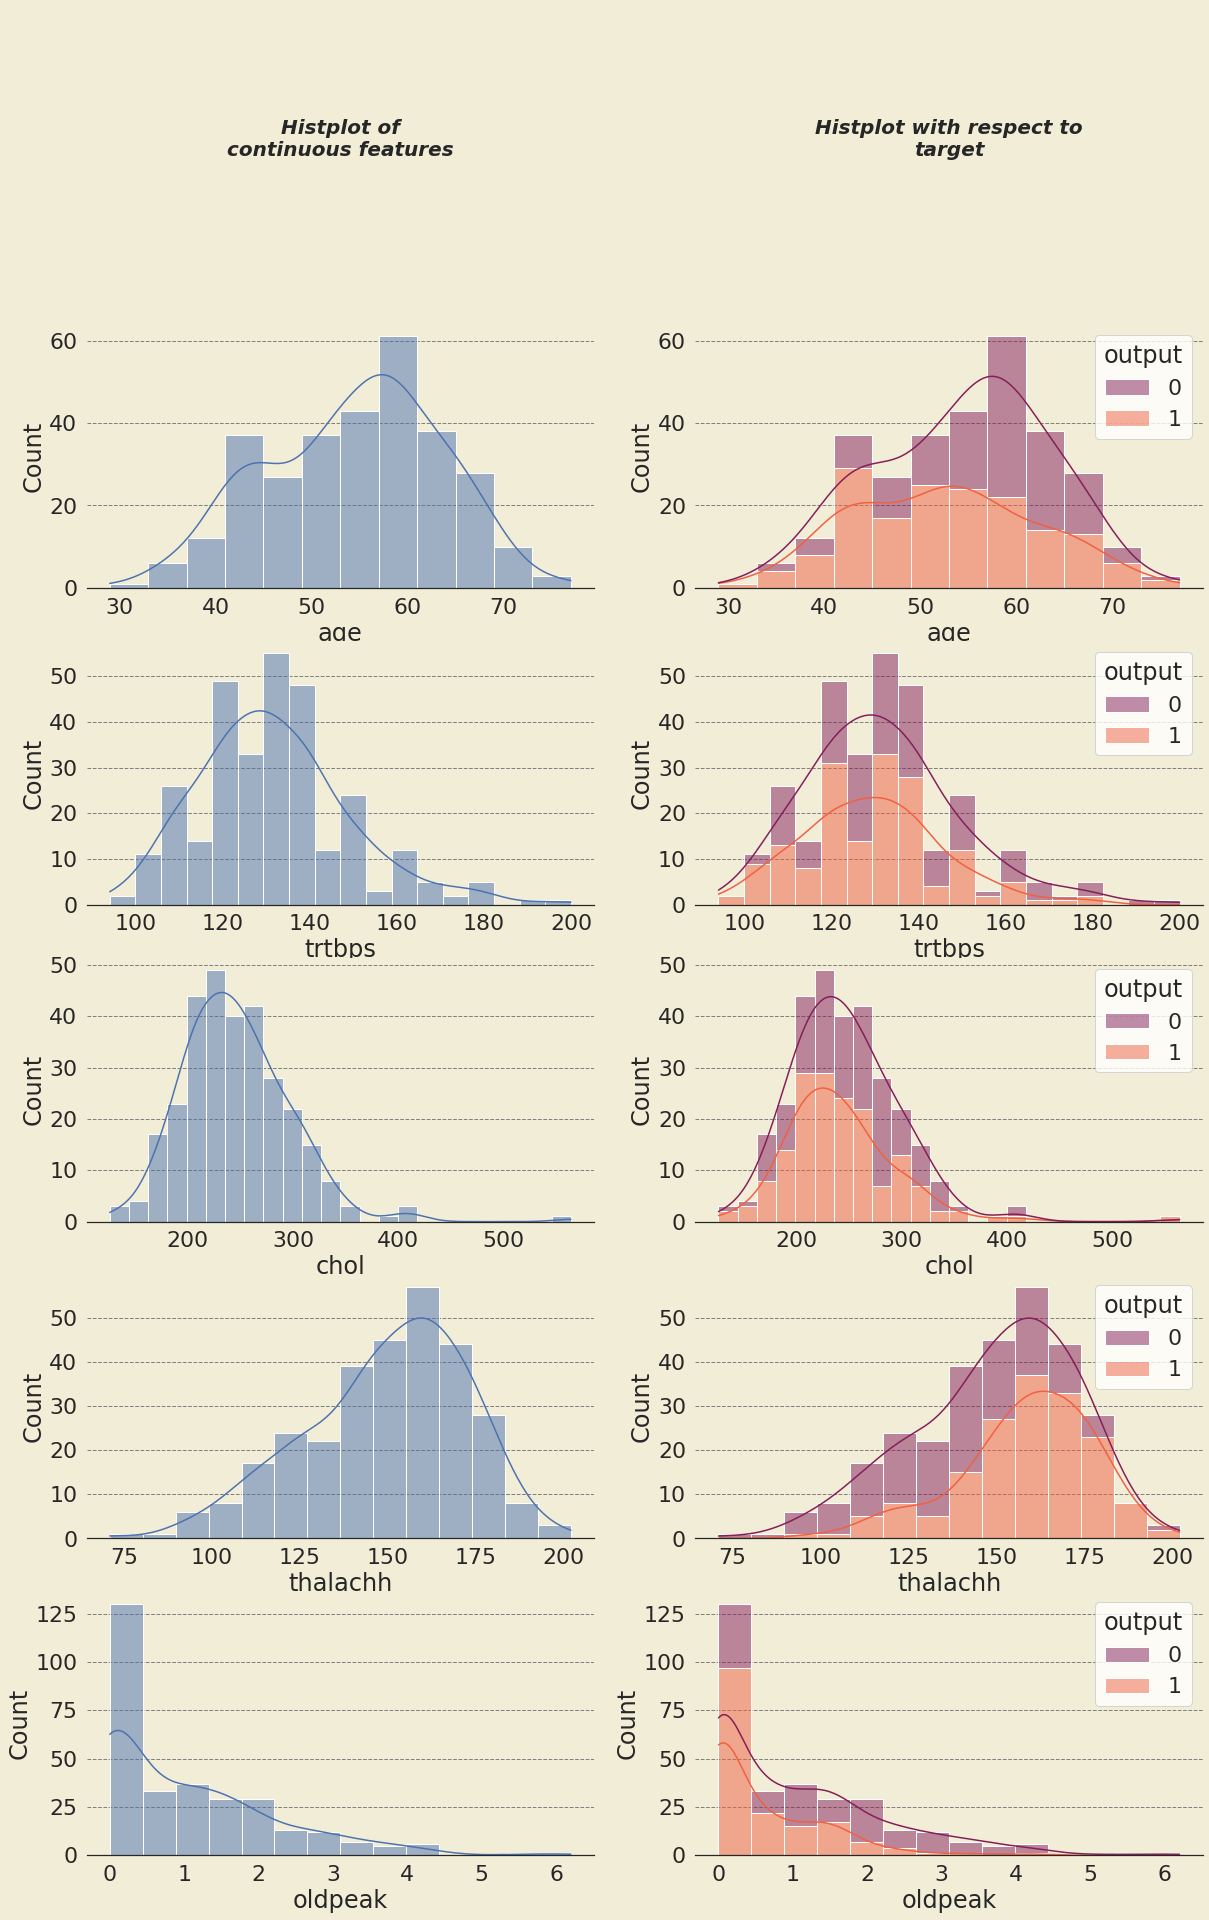

In [23]:
con_columns=['age' , 'trtbps' , 'chol' , 'thalachh' , 'oldpeak']
plotting_con_features(6,2,con_columns)

**BOXEN PLOT OF CONTINUOUS FEATURES**

<AxesSubplot:xlabel='oldpeak'>

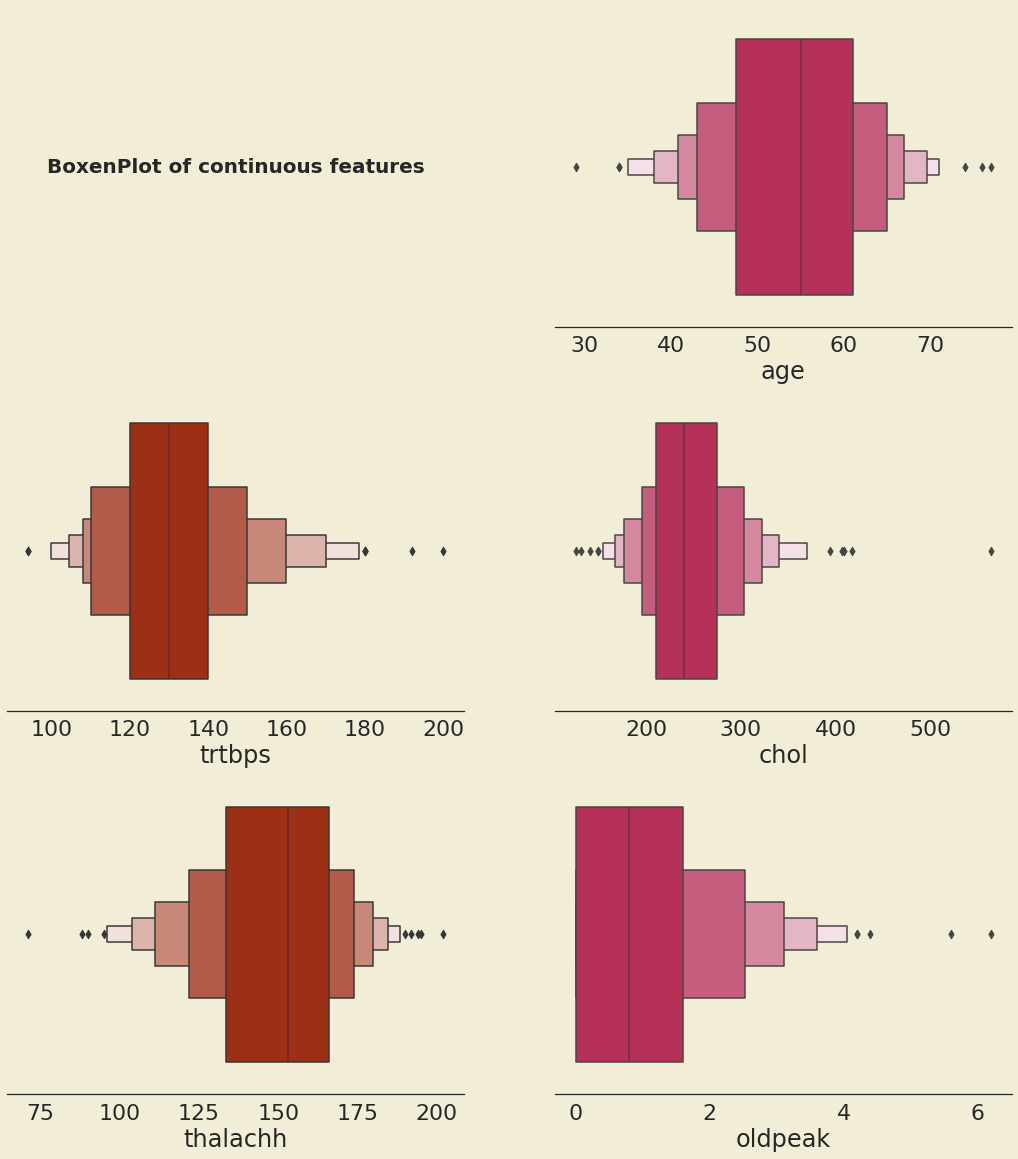

In [24]:
nrows=3
ncols=2
f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(18,20))

#Setting background and foreground color
f.patch.set_facecolor('#F2EDD7FF')
for i in range(0,nrows):
    for j in range(0,ncols):
        ax[i][j].set_facecolor('#F2EDD7FF')

ax[0][0].spines['bottom'].set_visible(False)
ax[0][0].spines['left'].set_visible(False)
ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)

ax[0][0].tick_params(left=False,bottom=False)
ax[0][0].set_xticklabels([])
ax[0][0].set_yticklabels([])
ax[0][0].text(0.5,0.5,"BoxenPlot of continuous features",
            horizontalalignment="center",
            verticalalignment='center',
            fontweight='bold',fontsize=20)

for i in range(0,nrows):
    for j in range(0,ncols):
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        

        

sns.boxenplot(data=df,x='age',palette='rocket',ax=ax[0][1])

sns.boxenplot(data=df,x='trtbps',palette='gnuplot',ax=ax[1][0])

sns.boxenplot(data=df,x='chol',palette='rocket',ax=ax[1][1])

sns.boxenplot(data=df,x='thalachh',palette='gnuplot',ax=ax[2][0])

sns.boxenplot(data=df,x='oldpeak',palette='rocket',ax=ax[2][1])


<html>
        <h1 style="color:PINK;">Observations from univariate analysis of continuous features</h1>
</html>

1. Age is normally distributed with little variance and after applying log results are same , so we will go ahead with original age values and Age have some outliers also we can see from boxen plot as the we have very less data of 303 rows if we remove outliers there will be loss of data for us

2. In original form 'trtbps' is right skewed , 'chol' is right skewed and 'thalachh' is left skewed

3. After applying log 'trbps' and 'chol' become less skewed nearly have normal distribution and 'thalachh' still left skewed

4. We will now go ahead with original form of data with no changes

5. We have outliers in all continuous features but we will not remove it because we will have loss of data

[Table of Contents](#toc)

<html>
    <a id='4.2'></a>
    <h1 style="color:coral; background-color:teal; font-size:25px; padding:15px;"><center><b>4.2. BIVARIATE ANALYSIS</b></center></h1>
</html>


<html>
    <a id='4.2.1'></a>
    <h1 style="color:#101820FF; background-color:#FEE715FF; font-size:20px; padding:15px;"><center><b>4.2.1. CONTINUOUS VS CATEGORICAL</b></center></h1>
</html>

* **First , we will see that how our continuous features correlate with our categorical features**

 Sex , exng , caa , cp , fbs , restecg , thall , slp

We are not able to conclude anything from blood pressure and old peak as all the categorical features are nearly uniformly distributed , so we will not plot them w.r.t categoricsl features

**Age**

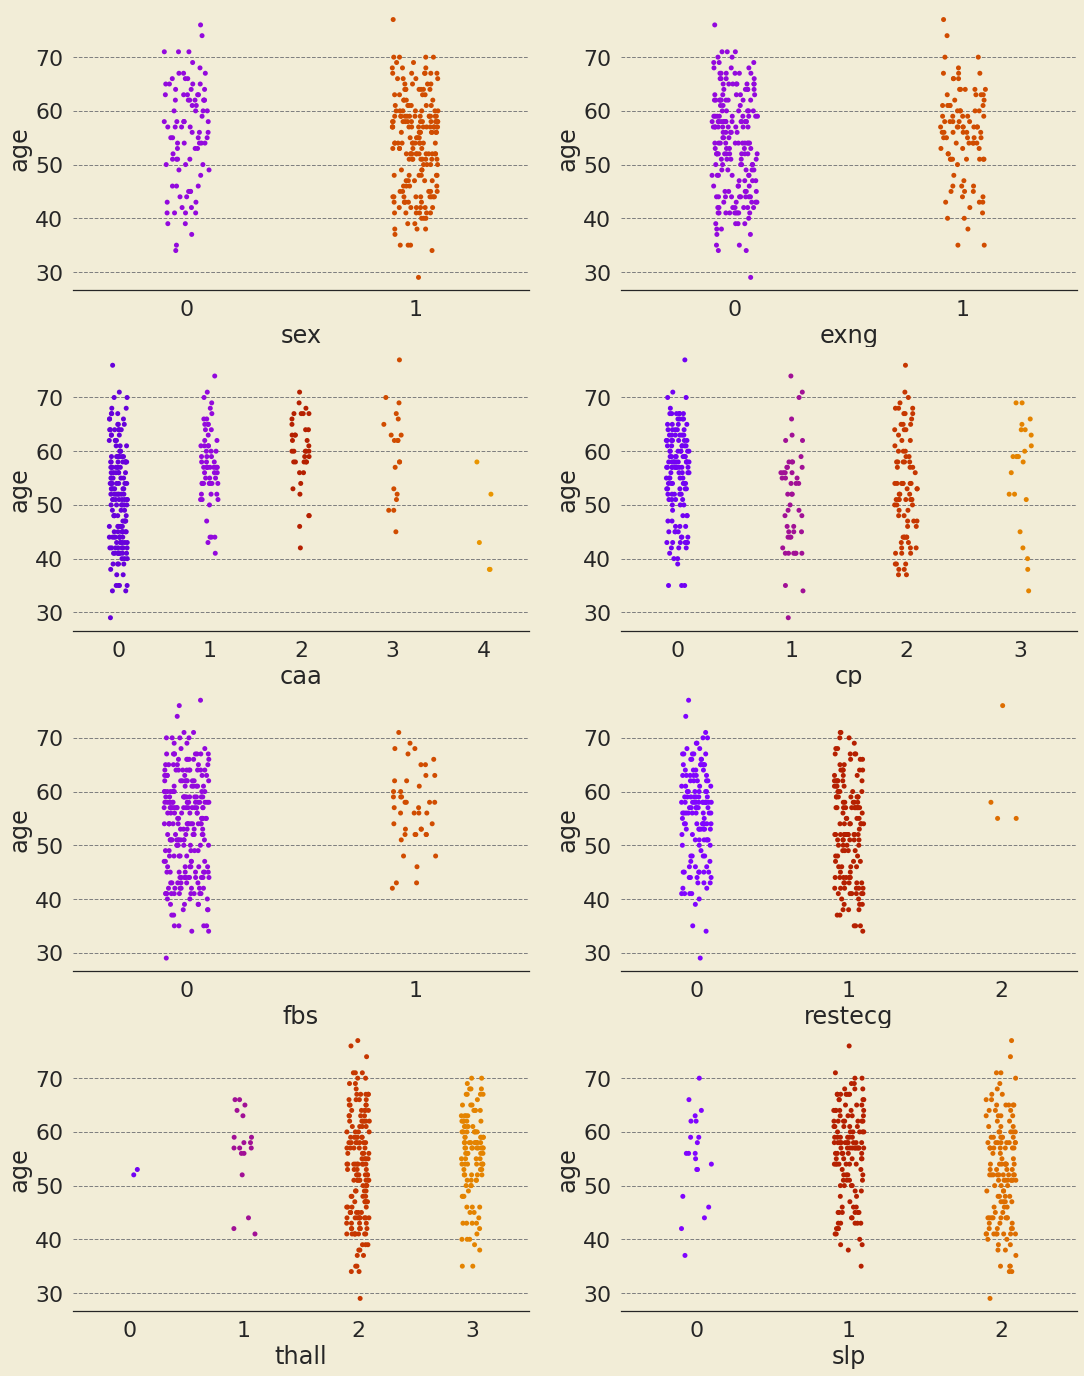

In [25]:
nrows=4
ncols=2
f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(18,24))
cat_columns=['sex','exng','caa','cp','fbs','restecg','thall','slp']
n=len(cat_columns)
f.patch.set_facecolor('#F2EDD7FF')
for i in range(0,nrows):
    for j in range(0,ncols):
        ax[i][j].set_facecolor('#F2EDD7FF')
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        sns.stripplot(data=df,x=cat_columns[(i*(nrows-2)+j)],y='age',palette='gnuplot',ax=ax[i][j])
        ax[i][j].grid(linestyle="--",axis='y',color='gray')
        


* **caa(number of major vessels)** show slightly +ve correlation with age
* **Chest pain** is majorly having to the people who are above or equal to 40
* People having age above 40 have fasting Blood sugar greater than 120


We are not able to conclude anything from blood pressure and old peak as all the categorical features are nearly uniformly distributed

**chol** - serum cholestoral in mg/dl

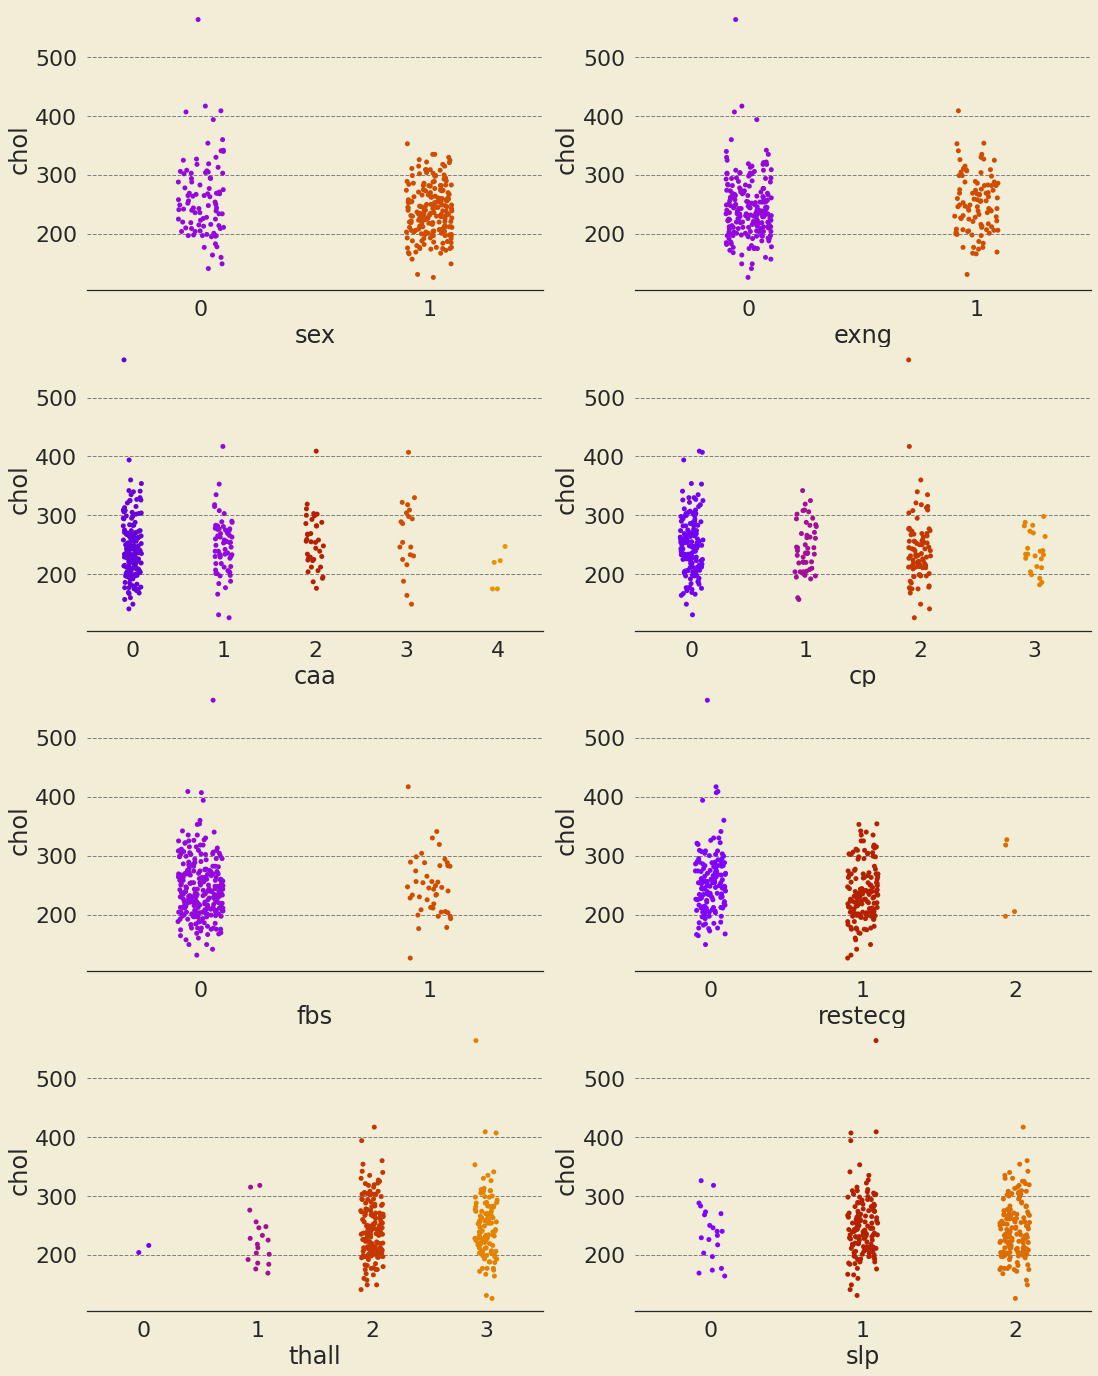

In [26]:
nrows=4
ncols=2
f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(18,24))
cat_columns=['sex','exng','caa','cp','fbs','restecg','thall','slp']

f.patch.set_facecolor('#F2EDD7FF')
for i in range(0,nrows):
    for j in range(0,ncols):
        ax[i][j].set_facecolor('#F2EDD7FF')
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        sns.stripplot(data=df,x=cat_columns[(i*(nrows-2))+j],y='chol',palette='gnuplot',ax=ax[i][j])
        ax[i][j].grid(linestyle="--",axis='y',color='gray')
        

* People having chest pain type 3 have more cholestrol as comparison to other ones
* People having restecg type 0 and type 2 have little more chorestrol as compared to restecg type 1


**thalach** - maximum heart rate achieved

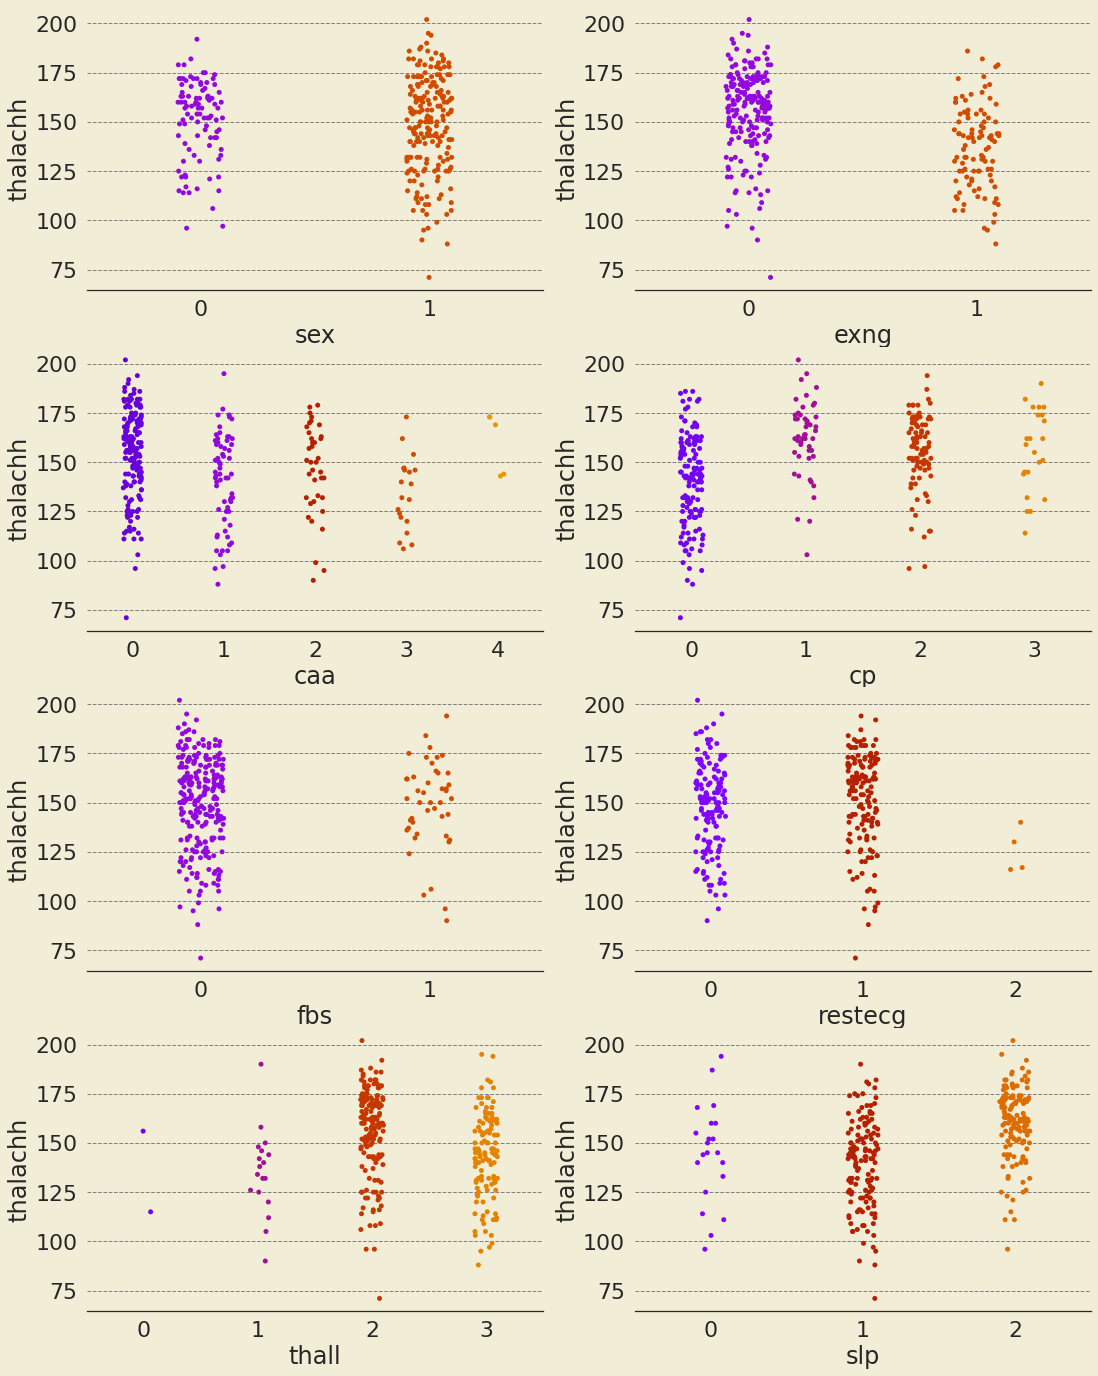

In [27]:
nrows=4
ncols=2
f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(18,24))
cat_columns=['sex','exng','caa','cp','fbs','restecg','thall','slp']

f.patch.set_facecolor('#F2EDD7FF')
for i in range(0,nrows):
    for j in range(0,ncols):
        ax[i][j].set_facecolor('#F2EDD7FF')
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        sns.stripplot(data=df,x=cat_columns[(i*(nrows-2))+j],y='thalachh',palette='gnuplot',ax=ax[i][j])
        ax[i][j].grid(linestyle="--",axis='y',color='gray')
        

* People having chest pain type 1 ,2 and 3 have more high heart rate
* People having blood sugar>120 have high heart rate excpet few
* People having restecg type 2 have more heart rate
* People having slp type 2 have high heart rate as comparison to other heart rates

[Table of Contents](#toc)

<html>
    <a id='4.2.2'></a>
    <h1 style="color:#101820FF; background-color:#FEE715FF; font-size:20px; padding:15px;"><center><b>4.2.2. CONTINUOUS VS CONTINUOUS</b></center></h1>
</html>

<AxesSubplot:xlabel='age', ylabel='chol'>

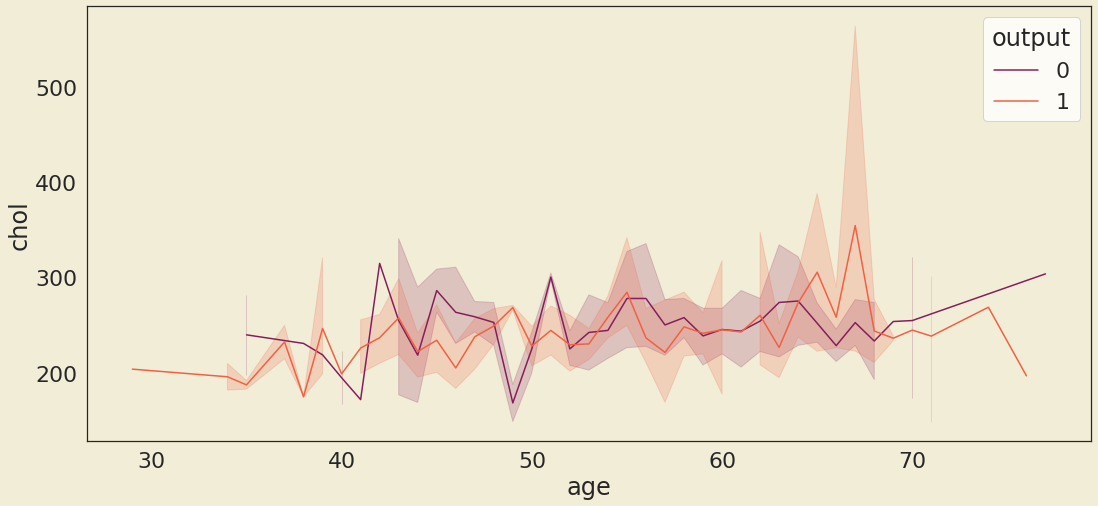

In [28]:
fig=plt.figure(figsize=(18,8))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

sns.lineplot(data=df,x='age',y='chol',hue='output',palette='rocket')

<AxesSubplot:xlabel='age', ylabel='trtbps'>

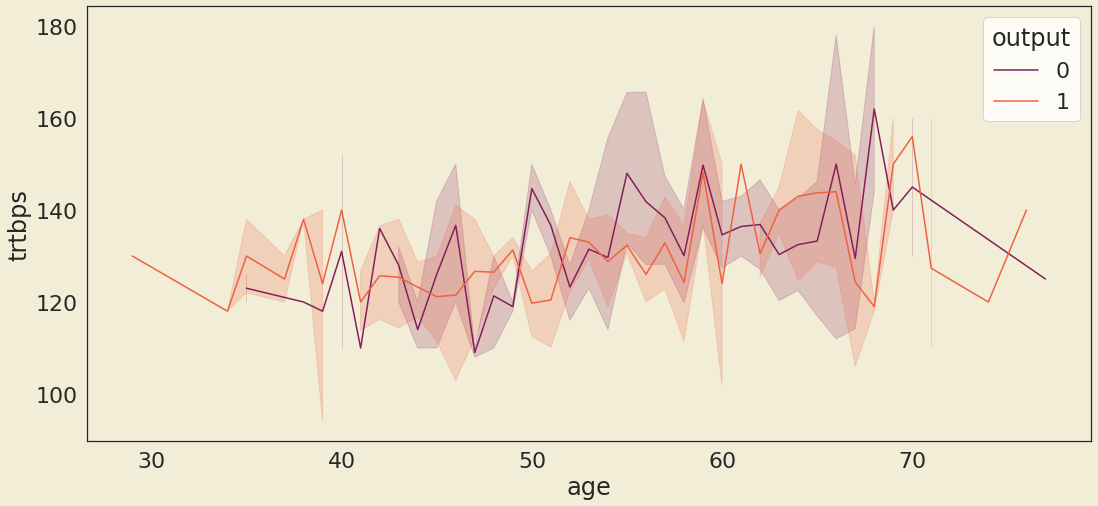

In [29]:
fig=plt.figure(figsize=(18,8))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

sns.lineplot(data=df,x='age',y='trtbps',hue='output',palette='rocket')

<html>
        <h1 style="color:PINK;">Observations from Bivariate analysis of features</h1>
</html>

* As the age increases cholestrol level increases

* People whose chances are positive to get heart attacks , thier blood pressure remians high as  age increases

* People having chest pain type 1,2 and 3 i.e chest pain other than asymptomatic chest pain have high heart rate

* People having chest pain type 1,2 and 3 and are above age of 40 have high chances to get heart attacks

* Most people above age 40 have high blood sugar


[Table of Contents](#toc)

<html>
    <a id='4.3'></a>
    <h1 style="color:coral; background-color:teal; font-size:25px; padding:15px;"><center><b>4.3. MULTIVARIATE ANALYSIS</b></center></h1>
</html>

<AxesSubplot:title={'center':'Heatmap of Features'}>

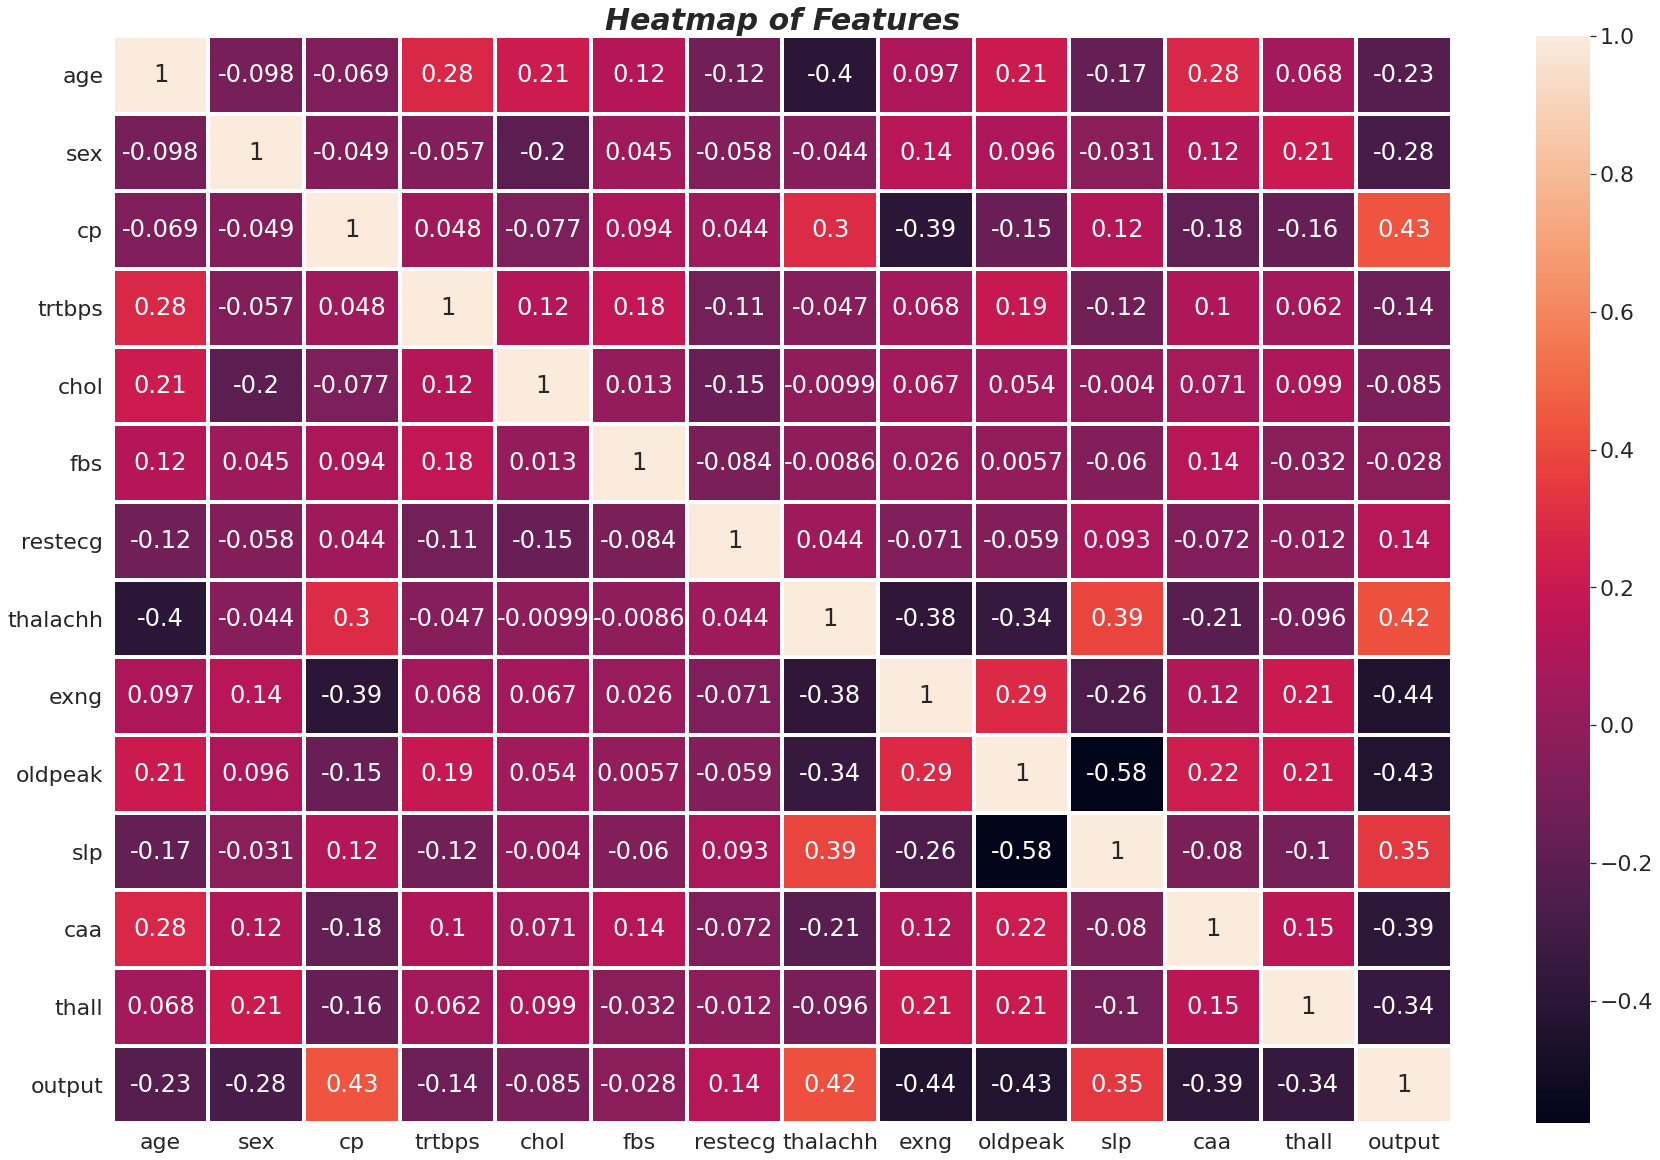

In [30]:
plt.figure(figsize=(30,20))
plt.title("Heatmap of Features",fontsize=30,fontweight='bold',fontstyle='italic')
sns.heatmap(df.corr(),annot=True,linewidth=3)

According to above heatmap there is no significant +ve and -ve correlation between two features so we don't need to take any actions

**But will tell you some highest(+ve and -ve) correlated columns**


* **Age vs thalachh** = -0.4 correlated
* **cp vs output** = 0.43 correlated
* **thalachh vs output** = 0.42 correlated
* **exng vs output** = -0.44 correlated
* **slp vs oldpeak** = -0.58 correlated

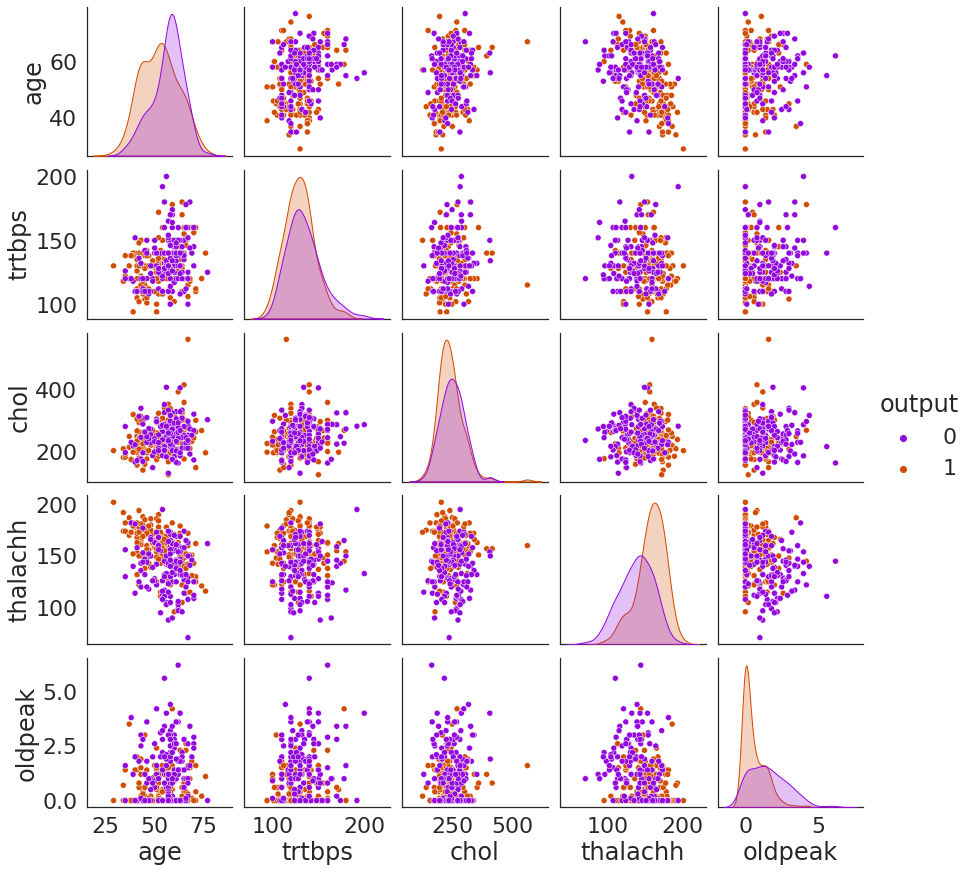

In [31]:
#pairplot of continuous variables
x_vars=['age','trtbps','chol','thalachh','oldpeak']
y_vars=['age','trtbps','chol','thalachh','oldpeak']

sns.pairplot(data=df,x_vars=x_vars,y_vars=y_vars,hue='output',palette='gnuplot')

[Table of contents](#toc)
<html>
    <a id="5"></a>
    <h1 style="color:#990011FF; background-color:#FCF6F5FF; font-size:50px; border:10px solid brown; padding:15px;"><center><b>5. MODEL AND PREDICTION 🧭</b></center></h1>
</html>

[Table of Contents](#toc)

<html>
    <a id='5.1'></a>
    <h1 style="color:coral; background-color:teal; font-size:25px; padding:15px;"><center><b>5.1. PREPROCESSING</b></center></h1>
</html>

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics  import accuracy_score,classification_report,roc_auc_score,plot_roc_curve,roc_curve,auc,f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import optuna

As the data is not that imbalanced we have 138 -ve cases and 165 +ve cases but we will use SMOTE over sampling so that our model will have equal opportunity to learn about +ve and -ve cases

In [33]:
#ONE HOT ENCODING AND SCALING
df1=df.copy()

cat_features=['sex','exng','caa','cp','fbs','restecg','thall','slp']
con_features=['age','trtbps','chol','thalachh','oldpeak']

#df1=pd.get_dummies(df1,columns=cat_features,drop_first=True)

ss=StandardScaler()
df1[con_features]=ss.fit_transform(df1[con_features])

In [34]:
#First we will split data into training and testing set before oversampling to avoid any data leakage

Y=df1['output']
X=df1.drop('output',axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [35]:
#OverSampling
smt=SMOTE()
x_train_sampling,y_train_sampling=smt.fit_resample(x_train,y_train)

In [36]:
x_train_sampling.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,-1.363869,1,1,-0.663867,0.941846,0,1,0.540209,0,-0.896862,2,0,2
1,0.400752,1,0,1.049520,0.458709,0,0,-1.690047,1,-0.206705,2,0,3
2,-0.922713,1,2,1.049520,-0.294985,0,1,-0.115749,0,2.208842,1,0,2
3,0.069886,0,1,0.192827,0.072199,0,0,0.496478,0,0.310912,1,0,2
4,0.621330,1,0,-0.835206,-0.314310,1,1,0.452748,1,0.310912,2,2,3


In [37]:
y_train_sampling.value_counts()

0    133
1    133
Name: output, dtype: int64

[Table of Contents](#toc)

<html>
    <a id='5.2'></a>
    <h1 style="color:coral; background-color:teal; font-size:25px; padding:15px;"><center><b>5.2. LOGISTIC REGRESSION</b></center></h1>
</html>

In [38]:
clf_logistic=LogisticRegression(random_state=0)

clf_logistic.fit(x_train_sampling,y_train_sampling)

y_pred_proba=clf_logistic.predict_proba(x_test)

y_pred=np.argmax(y_pred_proba,axis=1)

print("Acuuracy of logistic Regression : ",accuracy_score(y_test,y_pred))

Acuuracy of logistic Regression :  0.8360655737704918


In [39]:
ans=classification_report(y_test,y_pred)
print("***** Classification report of Logistic Regression is *****")
print()
print(ans)

***** Classification report of Logistic Regression is *****

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [40]:
print("F1 Score with oversampling : ", f1_score(y_test,y_pred))

F1 Score with oversampling :  0.8387096774193549


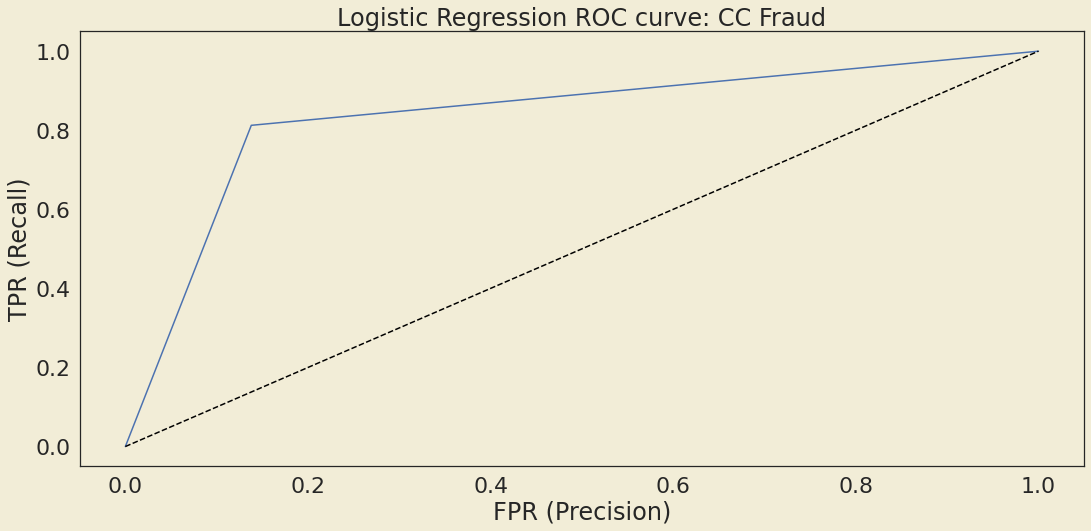

Area under curve (AUC):  0.8372844827586207


In [42]:
fig=plt.figure(figsize=(18,8))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

fpr,tpr,_=roc_curve(y_test,y_pred)

plt.title('Logistic Regression ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

[Table of Contents](#toc)

<html>
    <a id='5.3'></a>
    <h1 style="color:coral; background-color:teal; font-size:25px; padding:15px;"><center><b>5.3. RANDOMFOREST CLASSIFIER</b></center></h1>
</html>

In [43]:
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_depth = int(trial.suggest_int('max_depth', 1, 40))
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    return cross_val_score(clf, x_train_sampling, y_train_sampling, 
           n_jobs=-1, cv=5,scoring='f1').mean()

In [44]:
study = optuna.create_study(direction='maximize',study_name='Random Forest')
study.optimize(objective, n_trials=50)

[I 2021-06-12 07:12:18,395] A new study created in memory with name: Random Forest
[I 2021-06-12 07:12:21,335] Trial 0 finished with value: 0.8155838481368434 and parameters: {'n_estimators': 171, 'max_depth': 15}. Best is trial 0 with value: 0.8155838481368434.
[I 2021-06-12 07:12:21,394] Trial 1 finished with value: 0.7413217542336084 and parameters: {'n_estimators': 4, 'max_depth': 10}. Best is trial 0 with value: 0.8155838481368434.
[I 2021-06-12 07:12:22,231] Trial 2 finished with value: 0.8046437964551172 and parameters: {'n_estimators': 156, 'max_depth': 31}. Best is trial 0 with value: 0.8155838481368434.
[I 2021-06-12 07:12:22,979] Trial 3 finished with value: 0.799871677712054 and parameters: {'n_estimators': 139, 'max_depth': 23}. Best is trial 0 with value: 0.8155838481368434.
[I 2021-06-12 07:12:23,785] Trial 4 finished with value: 0.8283403096092574 and parameters: {'n_estimators': 152, 'max_depth': 21}. Best is trial 4 with value: 0.8283403096092574.
[I 2021-06-12 07:12:

In [45]:
trial = study.best_trial
print('## Accuracy -->',trial.value)
print("## best_parameters -->",trial.params)

## Accuracy --> 0.8394890378531448
## best_parameters --> {'n_estimators': 89, 'max_depth': 20}


In [46]:
clf_rf=RandomForestClassifier(**trial.params)
clf_rf.fit(x_train_sampling,y_train_sampling)

RandomForestClassifier(max_depth=20, n_estimators=89)

In [47]:
pred_rf=clf_rf.predict(x_test)
print("## Accuracy of random forest -->",accuracy_score(y_test,pred_rf))
print()
print("***** Classification report of Random Forest *****")
print()
print(classification_report(y_test,pred_rf))



## Accuracy of random forest --> 0.8360655737704918

***** Classification report of Random Forest *****

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [48]:
print("F1 Score with oversampling : ", f1_score(y_test,pred_rf,average='micro'))

F1 Score with oversampling :  0.8360655737704918


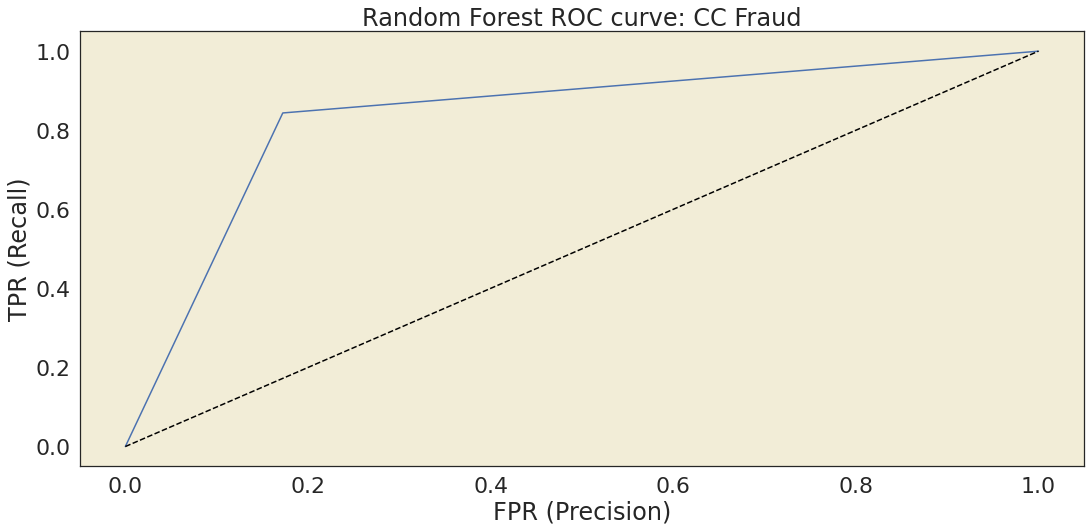

Area under curve (AUC):  0.8356681034482758


In [49]:
plt.figure(figsize=(18,8))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

fpr,tpr,_=roc_curve(y_test,pred_rf)

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

[Table of Contents](#toc)

<html>
    <a id='5.3.1'></a>
    <h1 style="color:#101820FF; background-color:#FEE715FF; font-size:20px; padding:15px;"><center><b>5.3.1. FEATURE IMPORTANCE FOR RF </b></center></h1>
</html>

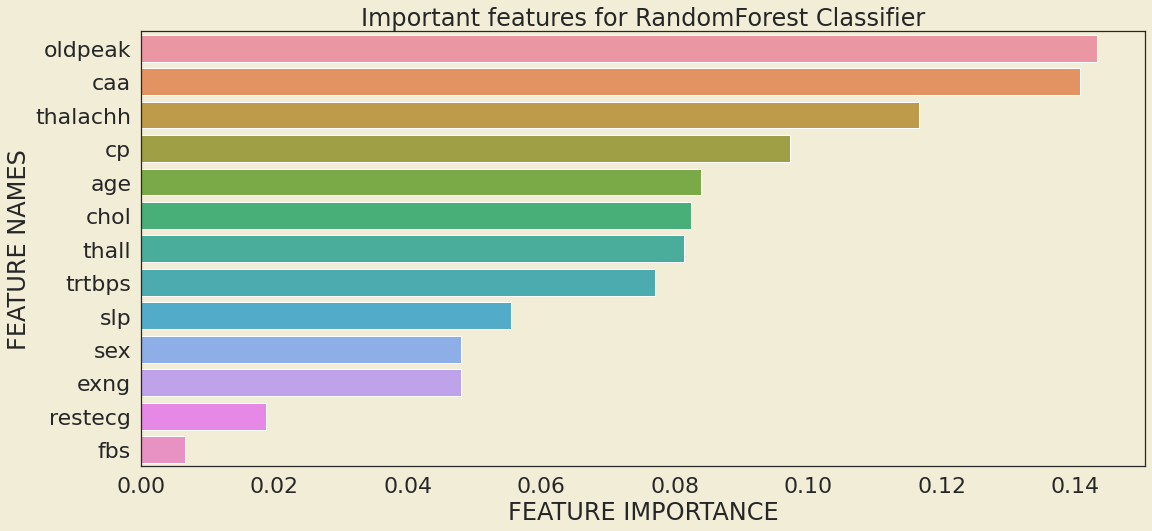

In [50]:
feature_importance = np.array(clf_rf.feature_importances_)
feature_names = np.array(x_train.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
df_plt = pd.DataFrame(data)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)
fig=plt.figure(figsize=(18,8))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
#plt.style.use("ggplot")
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.title("Important features for RandomForest Classifier")
plt.show()

[Table of Contents](#toc)

<html>
    <a id='5.4'></a>
    <h1 style="color:coral; background-color:teal; font-size:25px; padding:15px;"><center><b>5.4. LGBM CLASSIFIER</b></center></h1>
</html>

In [53]:
import lightgbm as lgb

In [54]:
#HYPERPARAMETER TUNING
def objective_lgbm(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 2, 300)
    max_depth = int(trial.suggest_int('max_depth', 2, 50))
    learning_rate=trial.suggest_loguniform('learning_rate',0.001,1)
    colsample_bytree=trial.suggest_loguniform("colsample_bytree",0.1, 1)
    num_leaves=trial.suggest_int('num_leaves',10,300)
    reg_alpha= trial.suggest_loguniform('reg_alpha',0.1,1)
    reg_lambda= trial.suggest_loguniform('reg_lambda',0.1,1)
    min_split_gain=trial.suggest_loguniform('min_split_gain',0.1,1)
    subsample=trial.suggest_loguniform('subsample',0.1,1)    
    clf = lgb.LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth,
                            learning_rate=learning_rate,colsample_bytree=colsample_bytree,
                            num_leaves=num_leaves,reg_alpha=reg_alpha,reg_lambda=reg_lambda,
                            min_split_gain=min_split_gain,subsample=subsample)
    return cross_val_score(clf, x_train_sampling, y_train_sampling, 
           n_jobs=-1, cv=5,scoring='f1').mean()

In [55]:
study_lgbm= optuna.create_study(direction='maximize',study_name="LGBM")
study_lgbm.optimize(objective_lgbm, n_trials=40)

[I 2021-06-12 07:14:42,502] A new study created in memory with name: LGBM
[I 2021-06-12 07:14:42,736] Trial 0 finished with value: 0.7975110493978419 and parameters: {'n_estimators': 116, 'max_depth': 17, 'learning_rate': 0.0027224586260937325, 'colsample_bytree': 0.5837855711226622, 'num_leaves': 153, 'reg_alpha': 0.19018185624859762, 'reg_lambda': 0.5146484095669325, 'min_split_gain': 0.9525151091474262, 'subsample': 0.12269011893094839}. Best is trial 0 with value: 0.7975110493978419.
[I 2021-06-12 07:14:42,788] Trial 1 finished with value: 0.8060739251110103 and parameters: {'n_estimators': 25, 'max_depth': 14, 'learning_rate': 0.012243761361632117, 'colsample_bytree': 0.2035931740066306, 'num_leaves': 158, 'reg_alpha': 0.7143489286540088, 'reg_lambda': 0.22298743809089352, 'min_split_gain': 0.3079604690623494, 'subsample': 0.8952899118366148}. Best is trial 1 with value: 0.8060739251110103.
[I 2021-06-12 07:14:42,921] Trial 2 finished with value: 0.8283728036669213 and parameters:

In [56]:
#GETTING BEST PARAMETERS
trial_lgbm= study_lgbm.best_trial
print("## Accuracy --> ",trial_lgbm.value)
print("## Best parameters --> ",trial_lgbm.params)

## Accuracy -->  0.8452531204052501
## Best parameters -->  {'n_estimators': 270, 'max_depth': 45, 'learning_rate': 0.007676130935871393, 'colsample_bytree': 0.6745262147526556, 'num_leaves': 129, 'reg_alpha': 0.2138541763568004, 'reg_lambda': 0.7320016349574004, 'min_split_gain': 0.12158524126597109, 'subsample': 0.1594636020295575}


In [57]:
#MODEL
model_lgbm=lgb.LGBMClassifier(**trial_lgbm.params)

In [58]:
#TRAINING
model_lgbm.fit(x_train_sampling,y_train_sampling)

LGBMClassifier(colsample_bytree=0.6745262147526556,
               learning_rate=0.007676130935871393, max_depth=45,
               min_split_gain=0.12158524126597109, n_estimators=270,
               num_leaves=129, reg_alpha=0.2138541763568004,
               reg_lambda=0.7320016349574004, subsample=0.1594636020295575)

In [59]:
#PREDICTING
pred_lgbm=model_lgbm.predict(x_test)
print('## Accuracy of LightGBM --> ',accuracy_score(pred_lgbm,y_test))

## Accuracy of LightGBM -->  0.819672131147541


In [60]:
#CLASSIFICATION REPORT
print("***** Classification report of LGBM Classifier *****")
print()
print(classification_report(y_test,pred_lgbm))

***** Classification report of LGBM Classifier *****

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



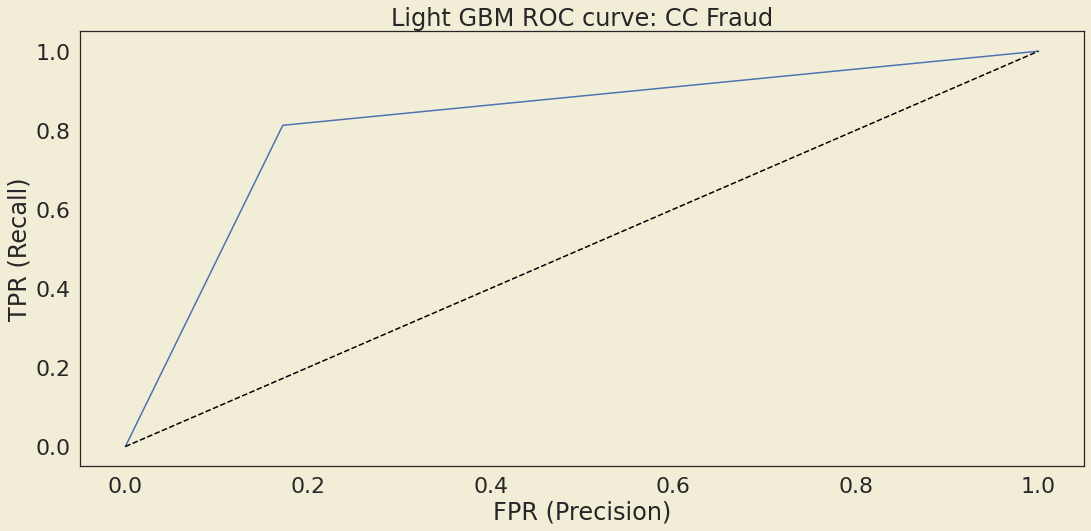

Area under curve (AUC):  0.8200431034482759


In [61]:
fig=plt.figure(figsize=(18,8))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

fpr,tpr,_=roc_curve(y_test,pred_lgbm)

plt.title('Light GBM ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

[Table of Contents](#toc)

<html>
    <a id='5.4.1'></a>
    <h1 style="color:#101820FF; background-color:#FEE715FF; font-size:20px; padding:15px;"><center><b>5.4.1. FEATURE IMPORTANCE FOR LGBM CLASSIFIER</b></center></h1>
</html>

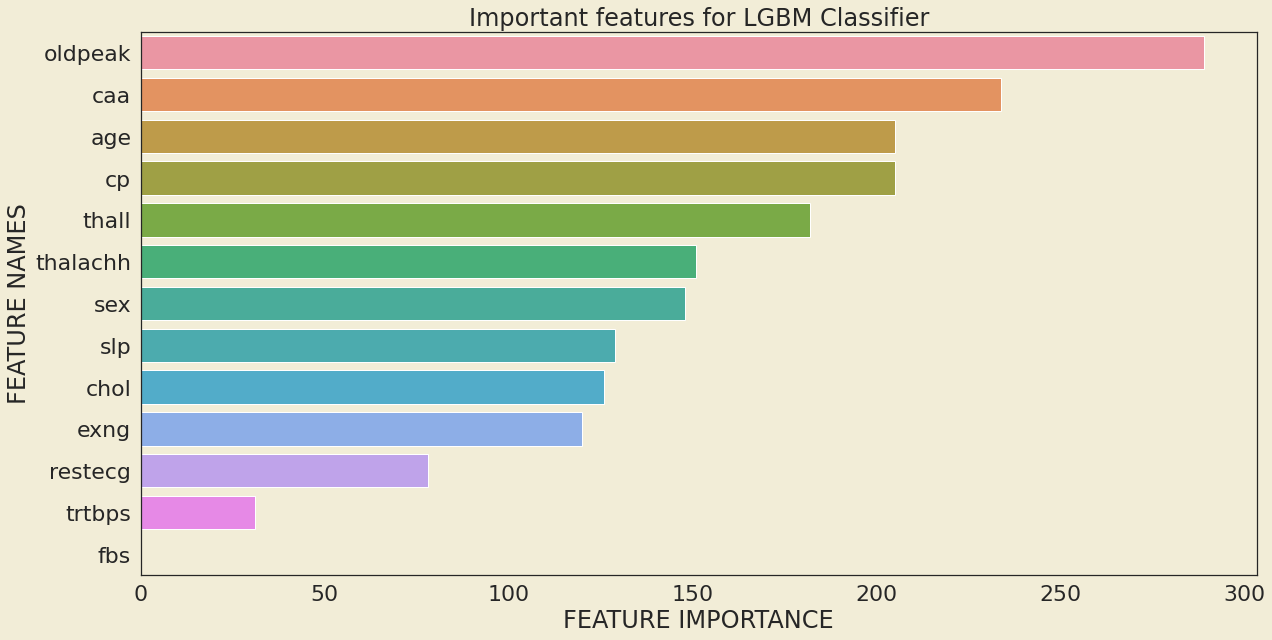

In [62]:
feature_importance = np.array(model_lgbm.feature_importances_)
feature_names = np.array(x_train.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
df_plt = pd.DataFrame(data)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)
fig=plt.figure(figsize=(20,10))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
#plt.style.use("ggplot")
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.title("Important features for LGBM Classifier")
plt.show()

[Table of Contents](#toc)

# **ANY SUGGESTIONS ARE MOST WELCOME , PLEASE CONSIDER TO GIVE IT A UPVOTE 👍**

**IF YOU THINK THAT I HAVE TO SOMETHING MORE OR ANY STEP TO INCREASE MY AUC TELL ME IN THE COMMENTS I WILL EDIT THIS NOTEBOOK AGAIN ACCORDING TO THE SUGGESTIONS 😊🙌**

**GIVE IT A UPVOTE MAY IT CAN HELP ME TO GET A JOB/INTERNSHIP 👨‍🎓**

**ANY SUGGESTIONS ARE MOST WELCOMED , PLEASE TELL ME IF YOU WANT ME TO DO IN THIS NOTEBOOK 🙏**